<a href="https://colab.research.google.com/github/Xantosh/ML_Tenorflow/blob/main/Boston_Hosuing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets  import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [6]:
# Normalizing the data / feature wise normalization along the column
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [12]:
# model definition
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(
      optimizer = "rmsprop",
      loss = "mse",
      metrics = ["mae"]
  )
  return model

In [10]:
# k- fold validation
import numpy as np

k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples] # prepares validation data from #k partition
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0
  )

  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples : ]],
       axis=0
  )

  model = build_model()
  model.fit(
      partial_train_data,
      partial_train_targets,
      epochs = num_epochs,
      batch_size = 16,
      verbose = 0
  )
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

all_scores



Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


[2.0196337699890137,
 2.4334523677825928,
 2.3229925632476807,
 2.3218350410461426]

In [13]:
#traing for longer epochs and saving all mae hstories

num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples] # prepares validation data from #k partition
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0
  )

  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples : ]],
       axis=0
  )

  model = build_model()
  history=model.fit(
      partial_train_data,
      partial_train_targets,
      validation_data = (val_data, val_targets),
      epochs = num_epochs,
      batch_size = 16,
      verbose = 0
  )
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [16]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

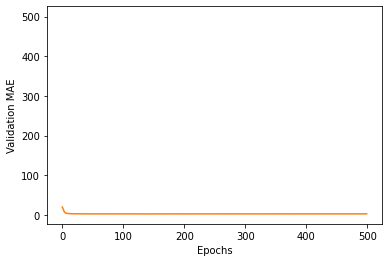

In [17]:
import matplotlib.pyplot as plt

plt.plot(1, len(average_mae_history)+1, average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

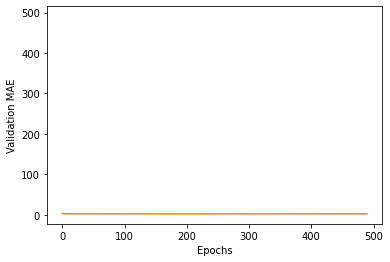

In [18]:
# plotting validatation scores omiting first 10 epochs

truncated_mae_scores = average_mae_history[10:]
plt.plot(1, len(truncated_mae_scores)+1, truncated_mae_scores)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


In [19]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 11ms/step


array([53.577835], dtype=float32)